<a href="https://colab.research.google.com/github/simondyates/Lending-Club/blob/master/LC_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None, 'display.max_columns', None)

import math
import time
import datetime as dt

import scipy
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [165]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.2.0'

In [166]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# Google Drive path
path = '/content/drive/My Drive/NYCDSA/lending_club/'  

Mounted at /content/drive


## Load accepted loans

In [167]:
tic = time.time()
source_df = pd.read_csv(path+'data/'+'datasets_902_370089_accepted_2007_to_2018Q4.csv.gz', 
                        compression='gzip')

print(f'Loaded in {time.time()-tic:.2f}')

Loaded in 58.35


In [3]:
source_df = pd.read_csv('./Dan/rawData/accepted_2007_to_2018Q4.csv')

In [4]:
df = source_df.copy()
df.shape

(2260701, 151)

In [ ]:
# check the dtypes
# df.dtypes.reset_index()

In [5]:
# url is useless, drop
df.drop(['url'], inplace=True, axis=1)

# inspect the actual records
df.sample(5).T

,863,1583162,1564289,383699,1068610
id,67849899,131984047,130967446,40461449,70974715
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,20000,10000,40000,24000,14000
funded_amnt,20000,10000,40000,24000,14000
funded_amnt_inv,20000,10000,40000,24000,14000
term,36 months,60 months,60 months,36 months,60 months
int_rate,6.99,15.04,10.9,12.39,12.99
installment,617.46,238.11,867.71,801.63,318.48
grade,A,C,B,C,C
sub_grade,A3,C4,B4,C1,C2


'id' is an object b/c there are 33 'Subtotal' fields, which must be removed

In [6]:
# same 33 records have NaN 'term':
print(len(df[df.term.isna()]))
df[df.term.isna()].sample(2)

33


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
528961,Total amount funded in policy code 1: 1741781700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1751196,Total amount funded in policy code 1: 1437969475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# remove these 33 records
df= df[~df.term.isna()]
df.shape

(2260668, 150)

## Select relevant fields

In the loan default/survival prediction context, select only features that are:
- known at loan origination
- static, i.e. are not updated later

Among the features we kept, there are a few that are clearly irrelevant to the prediction task ('member_id') but useful for reference purposes. There are some others such as 'zip_code' for which we decided to make a data-driven conclusion as opposed to pre-select.


Target for classification:
- loan_status

Targets for regression: survival time, realized return.  Necessary components:
- funded_amnt, total_pymnt, last_pymnt_d, recoveries

In [8]:
relevant_cols = [
# ------------ loan application and LC terms                 
    'id',  # not a predictor
    'desc', # not a predictor, mapped to new var _has_desc
    'title', # not a predictor
    'application_type',   # binary  {'Individual':0, 'Joint App':1}
    'purpose',  # cardinal
    'grade',    # ordinal, map to N
    'sub_grade', # ordinal, map to N
    'term',      # binary  {'36 months':0, '60 months':1}
    'loan_amnt', # numeric
    'int_rate',  # numeric
    'installment',  # numeric
    'issue_d',   # not a predictor
    'initial_list_status',  # binary  {'w':0, 'f':1}
    'disbursement_method',  # binary  {'Cash':0, 'DirectPay':1}

# ------------ borrower (self-declared except for verification status)
    'member_id', # not a predictor
    'addr_state', # cardinal
    'zip_code',   # not a predictor, b/c 956 zip_codes, too granular
    'home_ownership',  # cardinal, leave 4 categories: MORTGAGE, RENT, OWN, OTHER(+ANY,+NONE)
    'emp_length', # ordinal, map to N
    'emp_title',  # not a predictor
    'annual_inc', # numeric
    'annual_inc_joint',  # not a predictor (mapped to annual_inc)
    'verification_status',  # ordinal: {'Not Verified':0, 'Source Verified':1, 'Verified':2}
    'verification_status_joint',  # not a predictor (mapped to verification_status)

# ------------ hard credit inquiry at origination
    'fico_range_high',  # remove. fico_high=fico_low+4 or, very rarely, fico_high=fico_low+5
    'fico_range_low',  # numeric
    'delinq_2yrs',# numeric
    'dti', # numeric
    'dti_joint',  # not a predictor (mapped to dti)
    'earliest_cr_line', # not a predictor (mapped to new var _credit_hist)
    'open_acc', # numeric
    'pub_rec', # numeric
    'revol_bal', # numeric
    'revol_util', # numeric

# ------------ targets / target components 
    'loan_status',
    'funded_amnt',
    'total_pymnt',  # includes recoveries
    'last_pymnt_d',
    'last_credit_pull_d', # proxy if last_pymnt_d is NaN
    'recoveries',
]

In [9]:
print(f'{len(relevant_cols)} features selected')

# new dataframe of features
df = df[relevant_cols]

40 features selected


## Targets, remove current

All LC loans eventually end up in 2 categories: Fully Paid and Charged Off.  Intermediate stages such as Current and Delinquent indicate recent loans which have not yet developed a target variable.

Remove all loans in the intermediate stages.  This will be applicable to both classification and regression.

In [10]:
# first analyze the distribution of outcomes
df.loan_status.value_counts(dropna=False, normalize=True)

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

Fully Paid                                             0.476298
Current                                                0.388521
Charged Off                                            0.118796
Late (31-120 days)                                     0.009496
In Grace Period                                        0.003732
Late (16-30 days)                                      0.001924
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000018
Name: loan_status, dtype: float64

Leave: 
- Fully Paid
- Charged Off
- Default – added to Charged Off
- Does not meet the credit policy. Status:Fully Paid
- Does not meet the credit policy. Status:Charged Off

Remove:
- Current
- Late (31-120 days)
- Late (16-30 days)
- In Grace Period



In [11]:
remove_loans = ['Current','Late (31-120 days)','Late (16-30 days)','In Grace Period']
df = df[~df.loan_status.isin(remove_loans)]

In [12]:
df.loan_status.value_counts(dropna=False, normalize=True)

Fully Paid                                             0.798718
Charged Off                                            0.199213
Does not meet the credit policy. Status:Fully Paid     0.001475
Does not meet the credit policy. Status:Charged Off    0.000564
Default                                                0.000030
Name: loan_status, dtype: float64

### Classification target

In [13]:
# do not produce numpy targets yet b/c dataframe rows will be modified
good_loans = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
df['_good'] = df.loan_status.isin(good_loans).astype(int)

In [14]:
df._good.value_counts(dropna=False, normalize=True)

1    0.800193
0    0.199807
Name: _good, dtype: float64

### Regression target

In [16]:
# need to decide on how to calculate the duration & returns
# e.g. how to treat the opportunity cost

## Issue dates, remove pre-SEC

Lending Club registered its first prospectus with the SEC in October 2008. Assume consistent client onboarding and risk assessment started in January 2009, remove all earlier loans (0.13% of all loans). This will also take care of some of the missing data.

In [17]:
def make_dateval(s):
    s = s.split('-')
    return(dt.datetime.strptime(s[1] + s[0] + '01', '%Y%b%d'))

In [18]:
df.issue_d = df.issue_d.apply(make_dateval)

In [19]:
# check the oldest and the newest issue dates
print(min(df.issue_d))
print(max(df.issue_d))

2007-06-01 00:00:00
2018-12-01 00:00:00


In [20]:
years = df.issue_d.apply(lambda x: x.year)
print(f'{100*len(years[years<2009])/len(years):.4f}% of loans issued before 2009')

0.2222% of loans issued before 2009


In [21]:
# remove the pre-SEC tail
df = df[years>=2009]

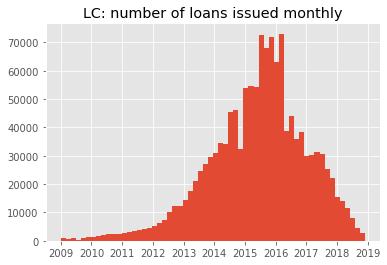

In [22]:
plt.hist(df.issue_d, bins=60)
plt.title('LC: number of loans issued monthly')
plt.show()

## Missing imputation

The nature of most missing data:
- protecting borrower identity
- missing joint application fields for indiv.app.
- missing optional textual descriptions/titles

In [23]:
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing>0].reset_index()
missing

,index,0
0,member_id,1345103
1,verification_status_joint,1319502
2,dti_joint,1319300
3,annual_inc_joint,1319297
4,desc,1222129
5,emp_title,85799
6,emp_length,78550
7,title,16660
8,last_pymnt_d,2322
9,revol_util,853


In [24]:
# All member_id are NaN, depersonalized
df.drop('member_id', inplace=True, axis=1)

In [25]:
# desc, emp_title, title
# all these strings are optional. Replace NaN with empty string
# these fields will NOT be treated as categorical (potentially, desc can be input for NLP)
# in contrast, 'purpose' is mandatory, has 14 fixed categories and will be dummified
df.desc.fillna('', inplace=True)
df.emp_title.fillna('', inplace=True)
df.title.fillna('', inplace=True)

In [26]:
# last_pymnt_d is missing only for charged-off and Late 31-120 
# However, 61% of such loans have non-zero total payments (recoveries)
# so there HAS to be a last payment date - important for return regression
# A simplifying assumption is made that in such case, last_pymnt_d ~ last_credit_pull_d

print(df[df.last_pymnt_d.isna()]['loan_status'].value_counts())
df.last_pymnt_d = np.where(df.last_pymnt_d.isna(), df.last_credit_pull_d, df.last_pymnt_d)
df.drop('last_credit_pull_d', inplace=True, axis=1)

# convert date fields to datetime
df.last_pymnt_d = df.last_pymnt_d.apply(make_dateval)
df.earliest_cr_line = df.earliest_cr_line.apply(make_dateval)

Charged Off                                            2312
Does not meet the credit policy. Status:Charged Off      10
Name: loan_status, dtype: int64


In [27]:
# revol_util is NaN for many revol_bal=0 but not only
# assume that revol_util=0, basically unutilized revolving balance
df.revol_util.fillna(0, inplace=True)

In [28]:
# the only missing zip_code comes from AL, impute one of AL zip_codes
df.zip_code.fillna('355xx', inplace=True)

In [29]:
# Joint Applications
# when the loan is joint (legally, a joint obligation), the joint numbers supercede the single numbers :
#    dti_joint  --> if exists, replace dti  
#    annual_inc_joint --> if exists, replace annual_inc
#    verification_status_joint --> if exists AND is 'verified', replace verification_status 

df.dti = np.where(df.application_type=='Joint App', df.dti_joint, df.dti)
df.annual_inc = np.where(df.application_type=='Joint App', df.annual_inc_joint, df.annual_inc)
df.verification_status = np.where(df.verification_status_joint=='Verified', 
                                  df.verification_status_joint, df.verification_status)

# drop the joint numbers, they will not be used anymore
df.drop(['dti_joint', 'annual_inc_joint', 'verification_status_joint'], inplace=True, axis=1)

# 4 loans have neither dti nor dti_joint, drop them
df[df.dti.isna()]
df = df[~df.dti.isna()]

In [30]:
df.emp_length.value_counts(dropna=False)

10+ years    442174
2 years      121732
< 1 year     107876
3 years      107613
1 year        88407
5 years       84185
4 years       80557
NaN           78550
6 years       62725
8 years       60704
7 years       59623
9 years       50954
Name: emp_length, dtype: int64

In [31]:
# For missing emp.length, assume it's roughly equivalent to years since earliest credit card
def distance_years(distance):
    if distance>=10:   return '10+ years'
    elif distance <1:  return '< 1 year'
    else:              return f'{int(distance)} years'

credit_history = np.round((df.issue_d - df.earliest_cr_line) / np.timedelta64(1,'Y'))
df.emp_length = np.where(df.emp_length.isna(), 
                         np.vectorize(distance_years)(credit_history), 
                         df.emp_length)

In [32]:
# verify there are no NaNs left
df.isnull().sum().sum()

0

## Group features

In [33]:
# create a new field 'has description' (proxy for extra transparency?)
df['_has_desc'] = np.vectorize(len)(df.desc)>0
df._has_desc = df._has_desc.astype(int)
# create a new field for credit history in Years
df['_credit_hist'] = credit_history

In [34]:
ordinal = [
    'application_type',
    'grade',
    'sub_grade',
    'term',
    'initial_list_status',  # LC claims this is purely random: chi2 test!
    'emp_length',
    'verification_status',
    '_has_desc',
]

In [35]:
df.home_ownership.replace({'ANY':'OTHER', 'NONE':'OTHER'}, inplace=True)

nominal = [
  'purpose',
  'addr_state', # if linear models do not pick up this feature, revisit amd remomve dummies (probably too much noise)
  'home_ownership',
  'disbursement_method', #highly imbalanced and probably irrelevant
]

In [36]:
numeric = [   
    'loan_amnt', # numeric
    'int_rate',  # numeric
    'installment',  # numeric
    'annual_inc', # numeric
    'fico_range_low', 
    'delinq_2yrs',# numeric
    'dti', # numeric
    'open_acc', # numeric
    'pub_rec', # numeric
    'revol_bal', # numeric
    'revol_util', # numeric
    '_credit_hist', # new numeric
]
print(len(numeric))

12


In [37]:
# check the integrity of numeric columns
for f in numeric:
    print(f'{f} \t{df[f].dtype} \t{df[f].isna().sum()}')

loan_amnt 	float64 	0
int_rate 	float64 	0
installment 	float64 	0
annual_inc 	float64 	0
fico_range_low 	float64 	0
delinq_2yrs 	float64 	0
dti 	float64 	0
open_acc 	float64 	0
pub_rec 	float64 	0
revol_bal 	float64 	0
revol_util 	float64 	0
_credit_hist 	float64 	0


## Visualize

### Categorical

In [38]:
def plot_categorical(f):
    _,axes = plt.subplots(1, 2, figsize=(14, 4))
    ax0,ax1=axes[0],axes[1]

    distr = df.groupby(f).count()._good
    ax0.bar(distr.index, distr.values)
    rot=0 if len(distr)<8 else 90
    for pos, val in enumerate(distr.values):
        ax0.text(pos, 1.02*val, f'{int(val/1000):,}K', rotation=rot, color='k', ha='center')
    ax0.set_title('# of loans per category')
    plt.setp( ax0.xaxis.get_majorticklabels(), rotation=rot )
    ax0.set_xlabel(f)

    distr = df.groupby(f)._good.mean().sort_values(ascending=False)
    ax1.bar(distr.index, distr.values)
    rot=0 if len(distr)<8 else 90
    for pos, val in enumerate(distr.values):
        ax1.text(pos, 1.02*val, f'{val:.3f}', rotation=rot, color='k', ha='center')
    ax1.set_ylim(0,1)
    ax1.set_title('Share of good loans')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=rot )
    ax1.set_xlabel(f)

    plt.show()


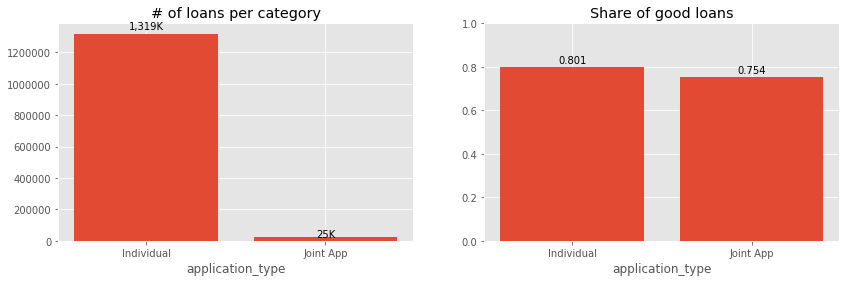

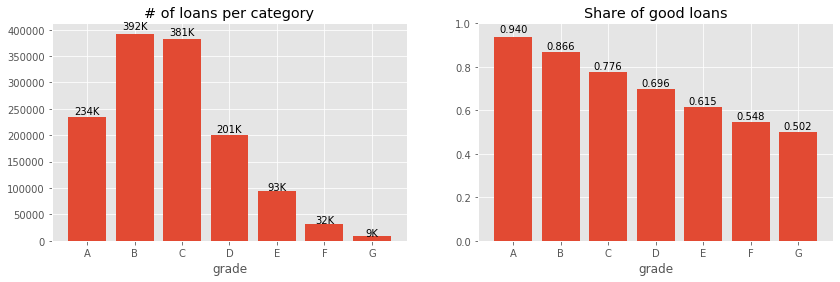

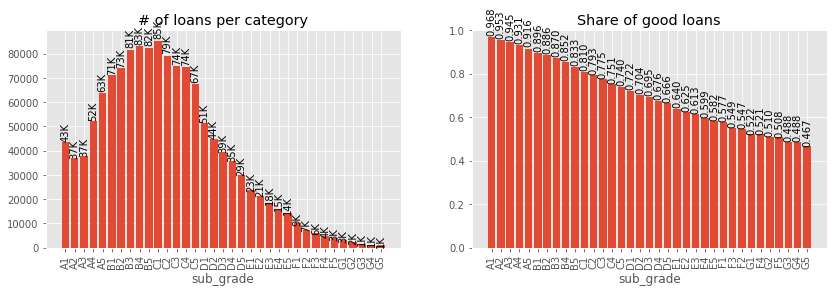

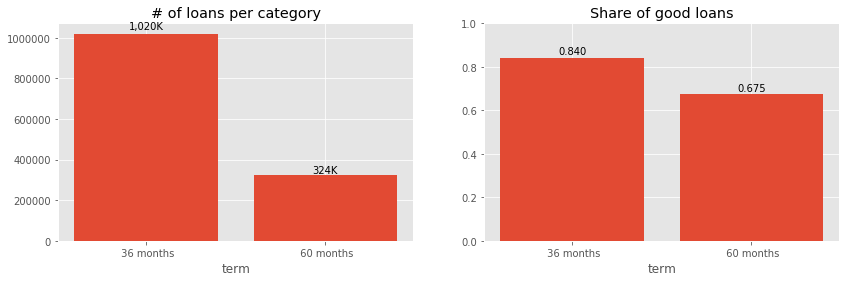

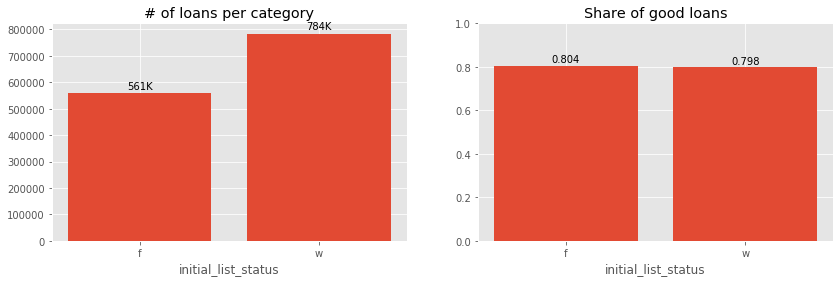

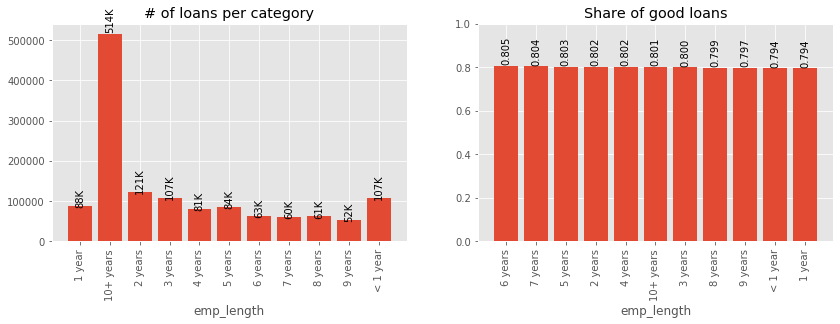

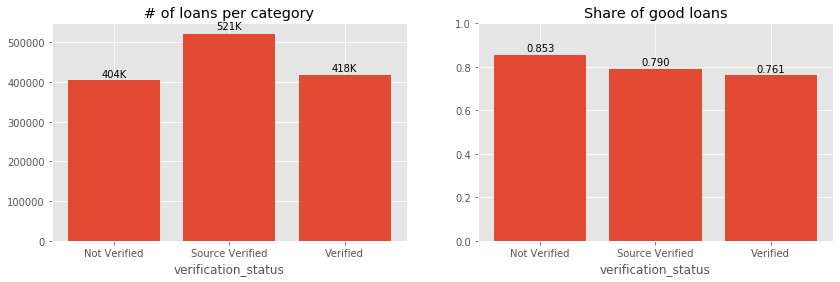

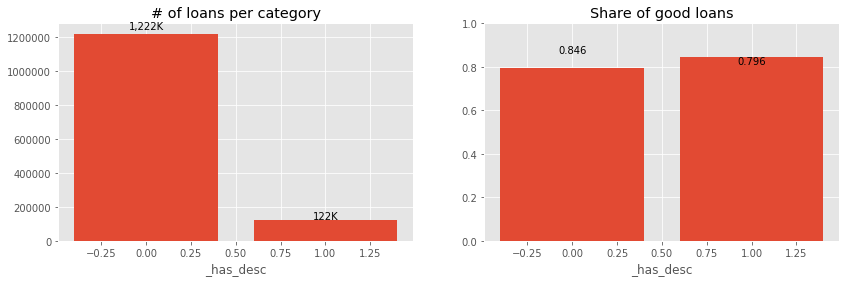

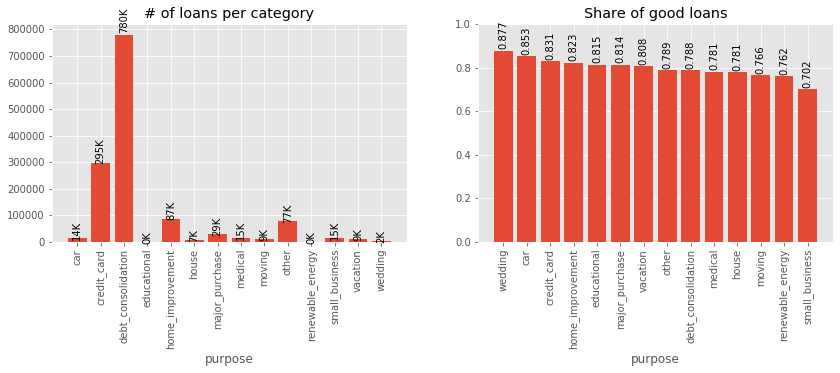

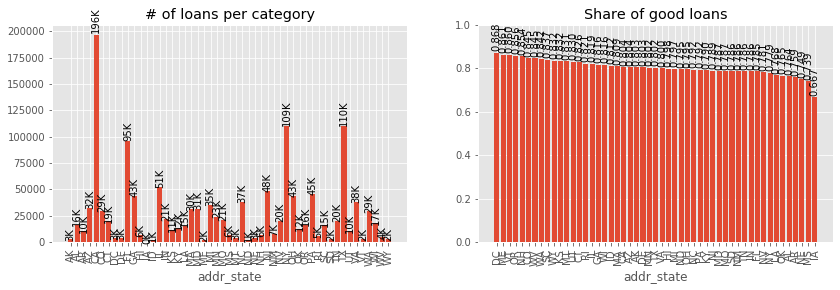

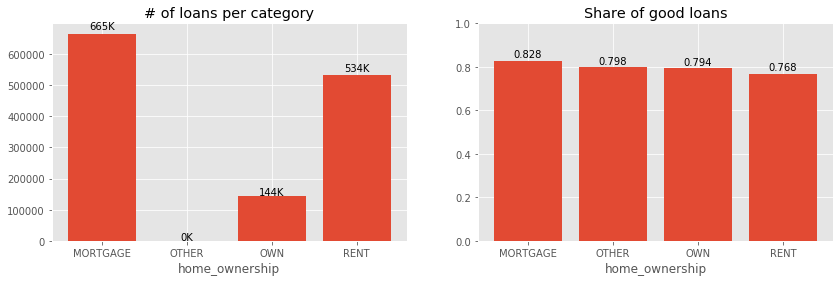

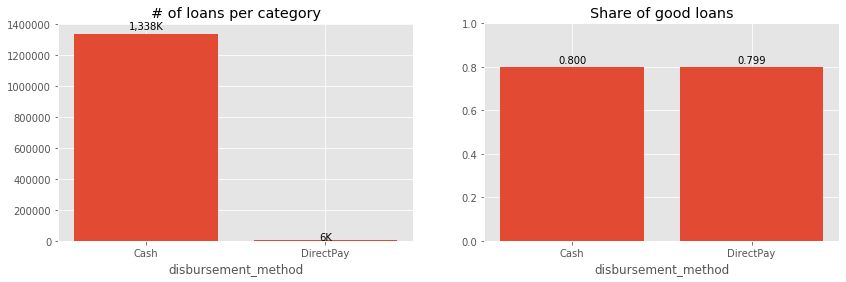

In [39]:
for f in ordinal+nominal:
    plot_categorical(f)

The following fields probably do not influence the default probability. Verify by chi_square tests:
- initial_list_status
- disbursement_method
- emp_length

In [40]:
p_values=[]
for f in ordinal+nominal:
    tab = pd.crosstab(df._good, df[f])
    p_values.append(scipy.stats.chi2_contingency(tab)[1])
sorted(list(zip(ordinal+nominal, p_values)), key=lambda x:x[1])

[('grade', 0.0),
 ('sub_grade', 0.0),
 ('term', 0.0),
 ('verification_status', 0.0),
 ('_has_desc', 0.0),
 ('purpose', 0.0),
 ('addr_state', 0.0),
 ('home_ownership', 0.0),
 ('application_type', 9.776366888251107e-79),
 ('initial_list_status', 6.894830033693952e-16),
 ('emp_length', 6.463066794700236e-11),
 ('disbursement_method', 0.8536480230498579)]

In [41]:
# conclusion: only the disbursement_method is irrelevant, drop the feature
nominal.remove('disbursement_method')

### Numeric

In [42]:
def plot_numeric(f):
    _,axes = plt.subplots(1, 2, figsize=(10, 4))
    ax0,ax1=axes[0],axes[1]

    ax0.hist(df[f], bins=40)
    ax0.set_title(f'{f} distribution')
    ax0.set_xlabel(f)

    ax1 = sns.violinplot(f,'_good',data=df, orient='h')
    ax1.set_title(f'{f} vs default')
    ax1.set_xlabel(f)

    plt.show()


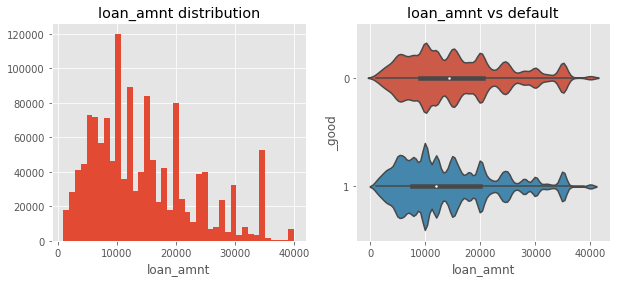

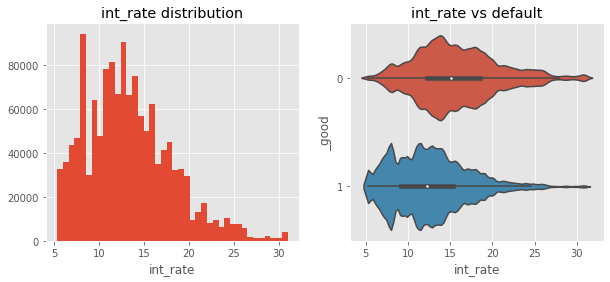

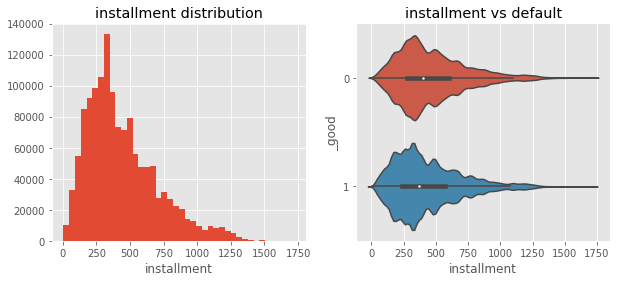

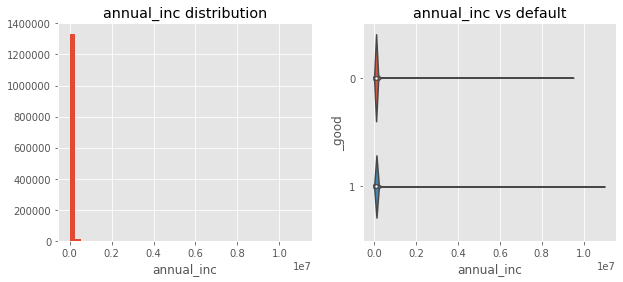

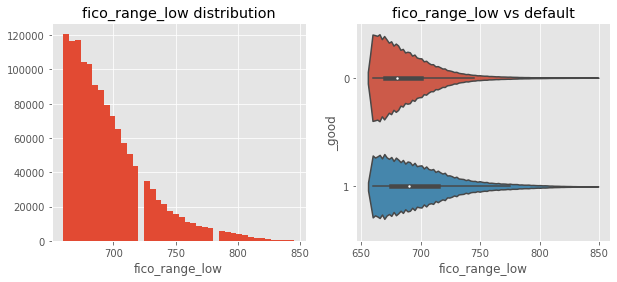

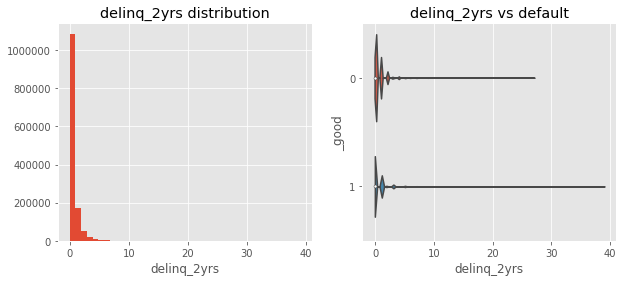

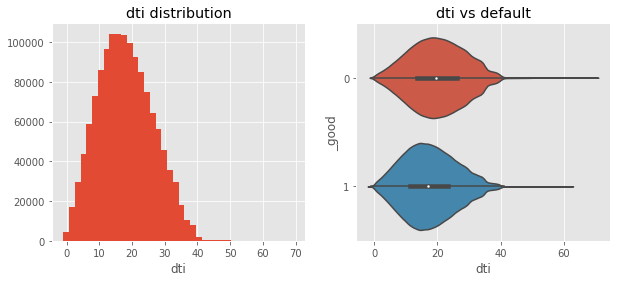

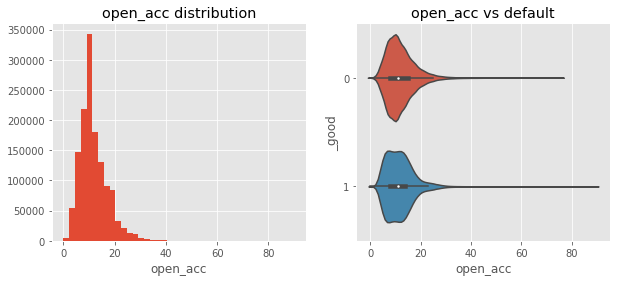

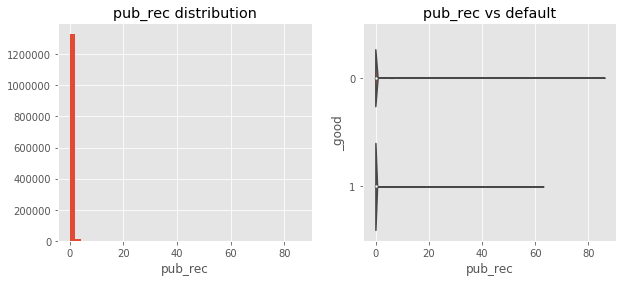

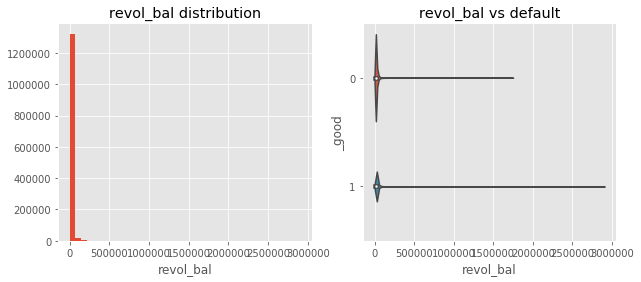

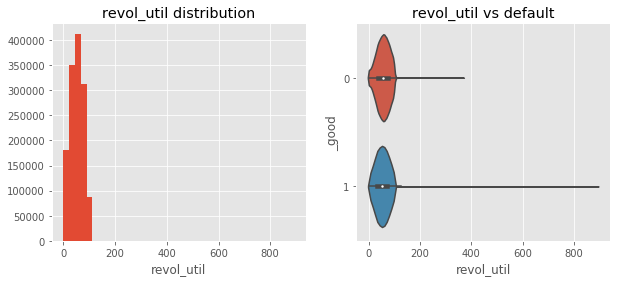

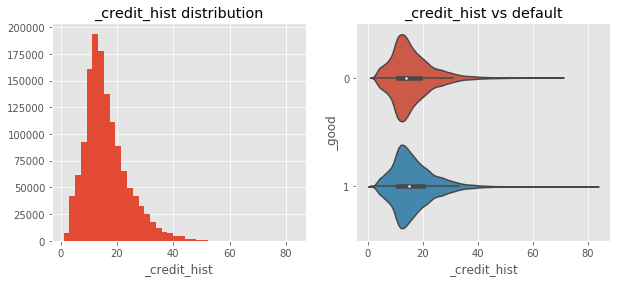

In [43]:
for f in numeric:
    plot_numeric(f)

### Grades stats

In [45]:
grade_dict = {
'% Good': df.groupby('grade')._good.mean(),
'Loan Amount': df.groupby('grade').loan_amnt.mean(),
'FICO low': df.groupby('grade').fico_range_low.mean(),
'Ann.Income': df.groupby('grade').annual_inc.mean(),
'Int.Rate': df.groupby('grade').int_rate.mean(),
'DTI': df.groupby('grade').int_rate.mean(),
'Description': df.groupby('grade')._has_desc.mean(),
'Cred.History': df.groupby('grade').dti.mean(),
}


In [46]:
pd.DataFrame(grade_dict)

,% Good,Loan Amount,FICO low,Ann.Income,Int.Rate,DTI,Description,Cred.History
grade,,,,,,,,
A,0.939561,13902.309548,727.477033,89987.902905,7.111558,7.111558,0.102259,15.478891
B,0.866104,13240.684210,697.103035,77482.967200,10.679999,10.679999,0.105576,17.191322
C,0.775553,14190.182521,687.979389,73974.884125,14.023724,14.023724,0.077060,18.636687
D,0.696121,15265.555412,683.289889,71501.207396,17.722076,17.722076,0.081953,19.842614
E,0.615242,17602.201328,682.052352,73187.284693,21.133141,21.133141,0.079546,20.490151
F,0.548206,19071.472016,679.897023,74337.413608,24.920397,24.920397,0.102946,20.662194
G,0.501684,20525.738729,678.548615,78299.778136,27.669288,27.669288,0.094948,20.770961


In [ ]:
# visualize

## X,Y, train/test split

In [47]:
# classification target 
Y = df._good

In [48]:
X = df[nominal+ordinal+numeric]
print(X.shape)
X.sample(5)

(1345100, 23)


,purpose,addr_state,home_ownership,application_type,grade,sub_grade,term,initial_list_status,emp_length,verification_status,_has_desc,loan_amnt,int_rate,installment,annual_inc,fico_range_low,delinq_2yrs,dti,open_acc,pub_rec,revol_bal,revol_util,_credit_hist
1956287,credit_card,NY,RENT,Individual,B,B2,36 months,f,5 years,Not Verified,0,1200.0,9.49,38.44,27000.0,695.0,0.0,3.33,6.0,0.0,782.0,5.7,15.0
71630,debt_consolidation,MI,OWN,Individual,E,E2,36 months,f,10+ years,Verified,0,3950.0,18.49,143.78,11000.0,685.0,0.0,25.83,6.0,0.0,6560.0,40.5,13.0
1229507,car,WA,RENT,Individual,A,A2,36 months,w,1 year,Source Verified,0,10000.0,6.49,306.45,82000.0,765.0,0.0,13.86,15.0,0.0,7435.0,14.8,8.0
1789619,debt_consolidation,GA,MORTGAGE,Individual,B,B1,36 months,f,< 1 year,Source Verified,1,8500.0,9.99,274.24,125000.0,725.0,0.0,11.23,19.0,0.0,11470.0,27.7,30.0
1227175,debt_consolidation,MS,OWN,Individual,C,C5,36 months,f,10+ years,Verified,0,7300.0,14.99,253.03,35000.0,665.0,0.0,24.45,12.0,1.0,6666.0,57.0,29.0


1. Convert Ordinal to numeric

In [49]:
sub_grades = sorted(df.sub_grade.unique())
sub_grades_dict = {x:sub_grades.index(x)+1 for x in sub_grades}  # map 'A1' to 1 rather than 0

emp_length_dict =  {'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, 
                    '6 years':6, '7 years':7, '8 years':8, '9 years':9, '10+ years':10,}
ordinal_dict = {
    'application_type': {'Individual':0, 'Joint App':1},
    'grade':   {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7},
    'sub_grade': sub_grades_dict,
    'term': {' 36 months':0, ' 60 months':1},
    'initial_list_status': {'w':0, 'f':1}, 
    'emp_length': emp_length_dict,
    'verification_status': {'Not Verified':0, 'Source Verified':1, 'Verified':2},  #'source verified' is a softer check
    '_has_desc': {False:0, True:1}
}

for f in ordinal:
    X[f].replace(ordinal_dict[f], inplace=True)

X.sample(5)

,purpose,addr_state,home_ownership,application_type,grade,sub_grade,term,initial_list_status,emp_length,verification_status,_has_desc,loan_amnt,int_rate,installment,annual_inc,fico_range_low,delinq_2yrs,dti,open_acc,pub_rec,revol_bal,revol_util,_credit_hist
266779,credit_card,MN,MORTGAGE,0,1,1,0,0,8,0,0,13000.0,5.32,391.50,42000.0,715.0,0.0,13.72,10.0,0.0,15806.0,41.8,14.0
64694,major_purchase,MI,RENT,0,6,30,1,0,10,2,0,27300.0,25.99,817.22,65000.0,680.0,0.0,26.20,10.0,0.0,10107.0,60.2,19.0
1740057,debt_consolidation,TX,RENT,0,2,10,0,0,0,1,0,8000.0,11.49,263.78,40000.0,690.0,0.0,29.10,14.0,0.0,9588.0,40.6,12.0
28491,small_business,RI,MORTGAGE,0,6,26,1,0,2,2,0,20000.0,21.99,552.27,65000.0,660.0,0.0,24.52,9.0,2.0,10969.0,59.3,14.0
314089,debt_consolidation,CA,RENT,0,2,7,0,0,10,2,0,16000.0,9.17,510.07,245000.0,720.0,0.0,16.40,13.0,0.0,18751.0,62.5,21.0


2. Dummify the remaining  nominal

In [50]:
# verify the object types:
for f in nominal:
    assert X[f].dtype=='object'
for f in ordinal+numeric:
    assert X[f].dtype!='object'
# dummify
X = pd.get_dummies(X, drop_first=True)

In [51]:
print(X.shape)
assert X.shape[0]==Y.shape[0]
X.sample(5)

(1345100, 86)


,application_type,grade,sub_grade,term,initial_list_status,emp_length,verification_status,_has_desc,loan_amnt,int_rate,installment,annual_inc,fico_range_low,delinq_2yrs,dti,open_acc,pub_rec,revol_bal,revol_util,_credit_hist,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
691346,0,4,18,0,0,9,0,0,22575.0,18.25,818.98,96000.0,720.0,1.0,14.54,10.0,1.0,10599.0,43.3,13.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1309909,0,3,11,0,1,2,2,1,9300.0,13.65,316.28,40000.0,665.0,0.0,18.48,8.0,1.0,6507.0,62.6,18.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
230933,0,2,6,0,0,2,2,0,30000.0,8.18,942.59,120000.0,780.0,0.0,13.85,6.0,0.0,1651.0,5.8,11.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
37274,0,3,11,0,0,9,1,0,20000.0,11.99,664.20,80000.0,680.0,1.0,5.25,8.0,0.0,14064.0,57.9,9.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1119244,0,1,3,0,1,10,0,0,8000.0,6.99,246.99,65000.0,765.0,0.0,8.14,11.0,0.0,12629.0,29.4,17.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
# select between testing on the most recent loans vs random sampling across dates
test_mode = 'recent'

if test_mode=='recent':
    X = pd.concat([X, Y, df.issue_d], axis=1)
    X.sort_values(by='issue_d', inplace=True)
    X.drop('issue_d', axis=1, inplace=True)
    Y = X.pop('_good')
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

if test_mode=='random':
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2020)    

In [60]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1076080, 86)
(269020, 86)
(1076080,)
(269020,)


For random sampling, the % of default is identical to total population:
- 0.80042, 0.19958

The most recent loans, however, skew this proportion towards defaulted loans b/c they are more likely to 'develop' the target variable before maturity:
- 0.782146, 0.217854

We have to be careful in interpreting the ROC curve for the most recent test set. Possible solution: slight upsampling of the recent good loans.

## Save csv

In [61]:
path = 'Dan/'
def save_features(X_train, X_test, Y_train, Y_test, test_mode):
    timestamp = int(time.time())
    X_train.to_csv(path+f'features/X_train_{test_mode}_{timestamp}.csv')
    X_test.to_csv(path+f'features/X_test_{test_mode}_{timestamp}.csv')
    Y_train.to_csv(path+f'features/Y_train_{test_mode}_{timestamp}.csv')
    Y_test.to_csv(path+f'features/Y_test_{test_mode}_{timestamp}.csv')    

In [ ]:
save_features(X_train, X_test, Y_train, Y_test, test_mode)